# 1.0 Predictive Analysis for Humanitarian Aid 

### 1.1 Problem definition

Predictive analytics to help organisations such as the United Nations(UN) to allocate resources more promptly and effectively to Humanitarian Crisis areas as well as provide an objective base for vulnerability assessment and priority setting.

This is achieved by analysing historical data on natural disasters, conflict zones, and other relevant factors.

This notebook also provides Key insights to the Natural Disasters database which contains over 22,000 mass disasters as of 1900 to 2021

### 1.2 Data and acknowledgements 
Sourced from https://www.kaggle.com/datasets/jnegrini/emdat19002021


### 1.3 Acknowledgements
TThe credit for creating and maintaining the Database is for the Centre for Research on the Epidemiology of Disasters - CRED and the School of Public Health from the Université catholique de Louvain.

“EM-DAT, CRED / UCLouvain, Brussels, Belgium – www.emdat.be (D. Guha-Sapir)”


### 1.4 Content 
For an event to be registered into the EM-DAT database it must fulfill one of three entry criteria:

Deaths: 10 or more people deaths

Affected: 100 or more people affected/injured/homeless.

Declaration/international appeal: Declaration by the country of a state of emergency and/or an appeal for international assistance


### 1.5 Key Insights 
.

..

...

....



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from matplotlib.colors import ListedColormap


# Exploritory Data Analysis with Visualisations.

Importing 1900_2021_DISASTERS.xlsx - emdat data.csv found in the directory of the humanitarian aid folder.

In [2]:
#reading csv file

emdata_org = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')
emdata_org.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


## Infomation on dataset 

The summaries below show information regarding the dataset

1. Data columns - 45 

2. Entries - 16125

3. Data types - float64(14), int64(4), object(27)

In [3]:
emdata_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [4]:
emdata_org.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,1900,1900,1902,1902,1902,1903,1903,1904,1905,1905
Seq,9002,9001,12,3,10,6,12,3,5,3
Glide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disaster Group,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural,Natural
Disaster Subgroup,Climatological,Climatological,Geophysical,Geophysical,Geophysical,Geophysical,Geophysical,Meteorological,Geophysical,Geophysical
Disaster Type,Drought,Drought,Earthquake,Volcanic activity,Volcanic activity,Mass movement (dry),Volcanic activity,Storm,Mass movement (dry),Earthquake
Disaster Subtype,Drought,Drought,Ground movement,Ash fall,Ash fall,Rockfall,Ash fall,Tropical cyclone,Rockfall,Ground movement
Disaster Subsubtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event Name,NaN,NaN,NaN,Santa Maria,Santa Maria,NaN,Mount Karthala,NaN,NaN,NaN
Country,Cabo Verde,India,Guatemala,Guatemala,Guatemala,Canada,Comoros (the),Bangladesh,Canada,India


## Death impact for each disaster group over time.

1. Climatological, Over time this subgroup has less or close to zero(O) Deaths recorderd 

In [5]:
pd.crosstab(emdata_org.Year,emdata_org['Disaster Subgroup'])

Disaster Subgroup,Biological,Climatological,Extra-terrestrial,Geophysical,Hydrological,Meteorological
Year,,,,,,
1900,1,2,0,2,1,1
1901,1,0,0,1,0,0
1902,0,0,0,9,0,1
1903,0,1,0,7,2,2
1904,0,0,0,3,0,1
...,...,...,...,...,...,...
2017,27,27,0,25,152,140
2018,16,27,0,30,141,124
2019,44,29,0,36,221,112


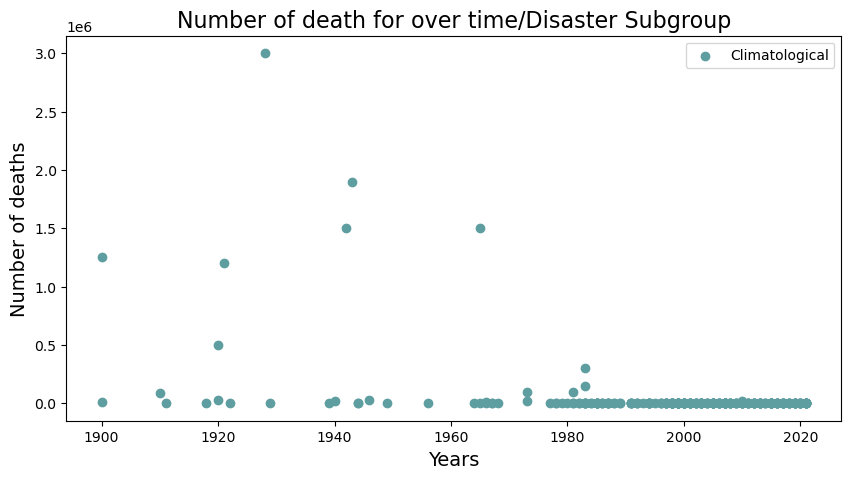

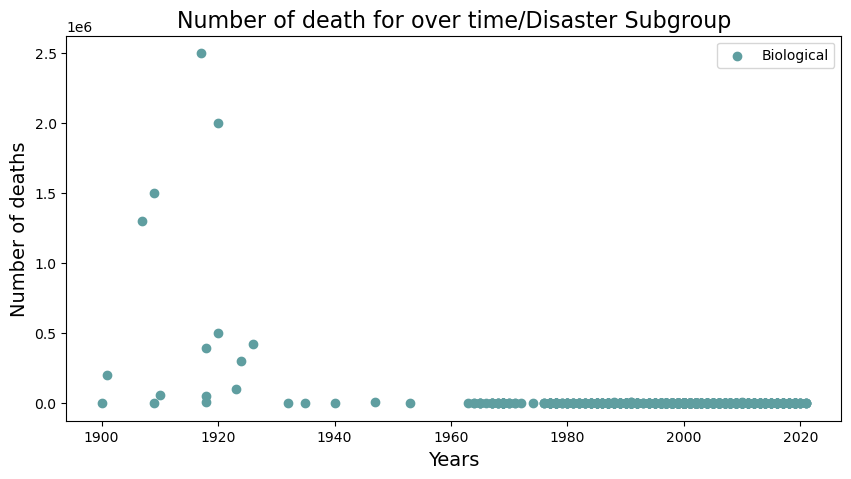

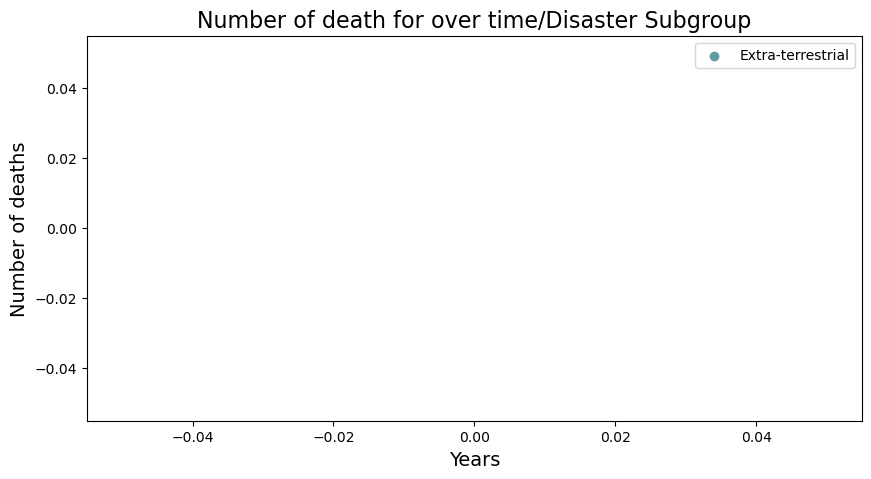

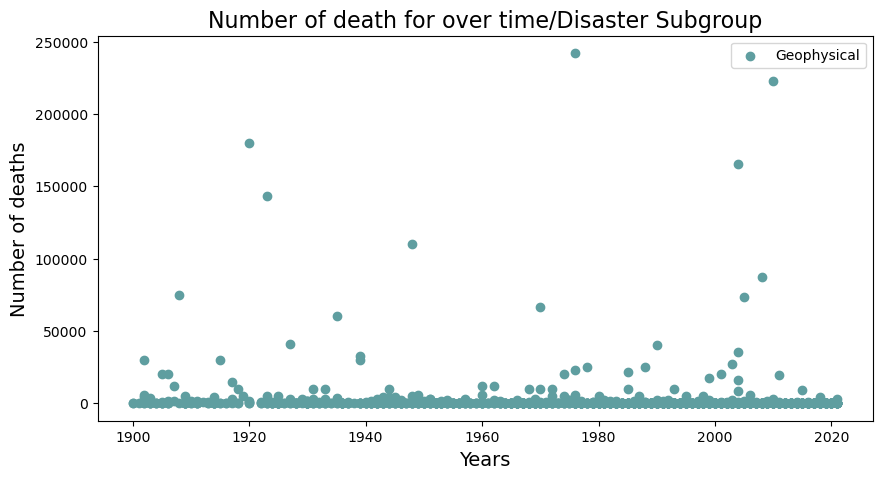

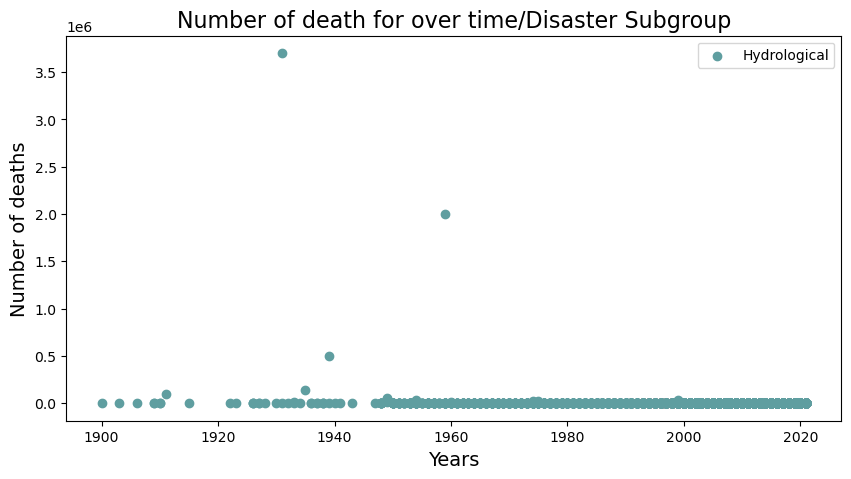

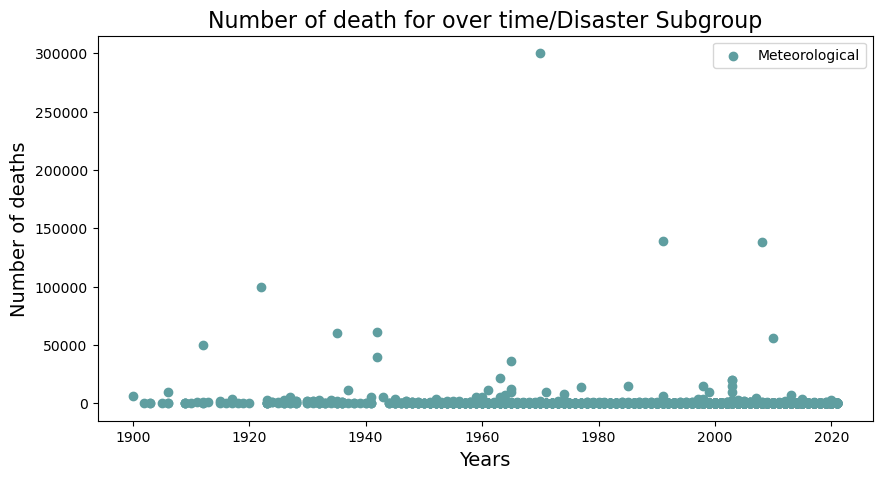

In [21]:
# Compare year column with disaster subgroup column


'''plt.figure(figsize=(10,5))
plt.scatter(
     emdata_org.Year[emdata_org['Disaster Subgroup']=='Climatological'],
    emdata_org['Total Deaths'][emdata_org['Disaster Subgroup']=='Climatological'],
    color='yellowgreen'
)

plt.scatter(
    emdata_org.Year[emdata_org['Disaster Subgroup']=='Biological'],
    emdata_org['Total Deaths'][emdata_org['Disaster Subgroup']=='Biological'],
    color='orangered'
)

plt.scatter(
    emdata_org.Year[emdata_org['Disaster Subgroup']=='Extra-terrestrial'],
    emdata_org['Total Deaths'][emdata_org['Disaster Subgroup']=='Extra-terrestrial'],
    color='teal'
)

plt.scatter(
    emdata_org.Year[emdata_org['Disaster Subgroup']=='Geophysical'],
    emdata_org['Total Deaths'][emdata_org['Disaster Subgroup']=='Geophysical'],
    color='cornflowerblue'
)


plt.title('Number of death for over time/Disaster Subgroup',fontsize=16)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of deaths',fontsize=14)
plt.legend(["Climatological","Biological"]);
;
'''
'''
Create a function to create a scatter plot for each disaster subgroup
1. Create a dictionary {sub_group_name,sub_group_disaster} which holds all disaster subgroups and names.
2. Create a list of colours 
2. loop through the list, create a new figure and create a different scatter plot.
3. Add title,labels and legend([sub_group_name])

'''
#Create a dictionary which holds names of disaster subgroups.
disaster_subs = {
    'Climatological':'Climatological',
    'Biological':'Biological',
    'Extra-terrestrial':'Extra-terrestrial',
    'Geophysical':'Geophysical',
    'Hydrological':'Hydrological',
    'Meteorological':'Meteorological'
}


#List of colors for the graphs 
colors = ['yellowgreen','coral','cadetblue','plum','deeppink','seagreen']
cmap = ListedColormap(colors)

for name,sub_group in disaster_subs.items():
    
    
    plt.figure(figsize=(10,5))
    


    plt.scatter(
    emdata_org.Year[emdata_org['Disaster Subgroup']==sub_group], 
    emdata_org['Total Deaths'][emdata_org['Disaster Subgroup']==sub_group],
    c=colors[2]
    )
   

    plt.title('Number of death for over time/Disaster Subgroup',fontsize=16)
    plt.xlabel('Years',fontsize=14)
    plt.ylabel('Number of deaths',fontsize=14)
    plt.legend([name]);


##  Biological disasters between 1900 - 2021